IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Acquire Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_red = pd.read_csv('winequality-red.csv')
df_white = pd.read_csv('winequality-white.csv')


Pandas DATAFRAME INFO

In [ ]:
df_red.info()
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column        

In [ ]:
df_red.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5
1,7.80,0.88,0.00,2.60,0.10,25.00,67.00,1.00,3.20,0.68,9.80,5
2,7.80,0.76,0.04,2.30,0.09,15.00,54.00,1.00,3.26,0.65,9.80,5
3,11.20,0.28,0.56,1.90,0.07,17.00,60.00,1.00,3.16,0.58,9.80,6
4,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5


In [ ]:
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.00,0.27,0.36,20.70,0.04,45.00,170.00,1.00,3.00,0.45,8.80,6
1,6.30,0.30,0.34,1.60,0.05,14.00,132.00,0.99,3.30,0.49,9.50,6
2,8.10,0.28,0.40,6.90,0.05,30.00,97.00,1.00,3.26,0.44,10.10,6
3,7.20,0.23,0.32,8.50,0.06,47.00,186.00,1.00,3.19,0.40,9.90,6
4,7.20,0.23,0.32,8.50,0.06,47.00,186.00,1.00,3.19,0.40,9.90,6


In [ ]:
df_red.shape, df_white.shape

((1599, 12), (4898, 12))

In [ ]:
df_red.isnull().values.any()


False

In [ ]:
df_white.isnull().values.any()

False

FEATURES

In [ ]:
features = df_red.select_dtypes(include=[np.number])
red_statistics = features.describe()
red_statistics


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00
mean,8.32,0.53,0.27,2.54,0.09,15.87,46.47,1.00,3.31,0.66,10.42,5.64
std,1.74,0.18,0.19,1.41,0.05,10.46,32.90,0.00,0.15,0.17,1.07,0.81
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,1.00,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,1.00,3.31,0.62,10.20,6.00
75%,9.20,0.64,0.42,2.60,0.09,21.00,62.00,1.00,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00,4.01,2.00,14.90,8.00


In [ ]:
features = df_white.select_dtypes(include=[np.number])
white_statistics = features.describe()
white_statistics

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00
mean,6.85,0.28,0.33,6.39,0.05,35.31,138.36,0.99,3.19,0.49,10.51,5.88
std,0.84,0.10,0.12,5.07,0.02,17.01,42.50,0.00,0.15,0.11,1.23,0.89
min,3.80,0.08,0.00,0.60,0.01,2.00,9.00,0.99,2.72,0.22,8.00,3.00
25%,6.30,0.21,0.27,1.70,0.04,23.00,108.00,0.99,3.09,0.41,9.50,5.00
50%,6.80,0.26,0.32,5.20,0.04,34.00,134.00,0.99,3.18,0.47,10.40,6.00
75%,7.30,0.32,0.39,9.90,0.05,46.00,167.00,1.00,3.28,0.55,11.40,6.00
max,14.20,1.10,1.66,65.80,0.35,289.00,440.00,1.04,3.82,1.08,14.20,9.00


In [ ]:
df_red['quality'].nunique(), df_white['quality'].nunique()

(6, 7)

COLORING

In [ ]:
color_red = np.repeat(0,df_red.shape[0])
color_white = np.repeat(1,df_white.shape[0])

In [ ]:
# add red array to red df
df_red['color'] = color_red
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5,0
1,7.80,0.88,0.00,2.60,0.10,25.00,67.00,1.00,3.20,0.68,9.80,5,0
2,7.80,0.76,0.04,2.30,0.09,15.00,54.00,1.00,3.26,0.65,9.80,5,0
3,11.20,0.28,0.56,1.90,0.07,17.00,60.00,1.00,3.16,0.58,9.80,6,0
4,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5,0


In [ ]:
# add red array to red df
df_white['color'] = color_white
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.00,0.27,0.36,20.70,0.04,45.00,170.00,1.00,3.00,0.45,8.80,6,1
1,6.30,0.30,0.34,1.60,0.05,14.00,132.00,0.99,3.30,0.49,9.50,6,1
2,8.10,0.28,0.40,6.90,0.05,30.00,97.00,1.00,3.26,0.44,10.10,6,1
3,7.20,0.23,0.32,8.50,0.06,47.00,186.00,1.00,3.19,0.40,9.90,6,1
4,7.20,0.23,0.32,8.50,0.06,47.00,186.00,1.00,3.19,0.40,9.90,6,1


PLOTTING

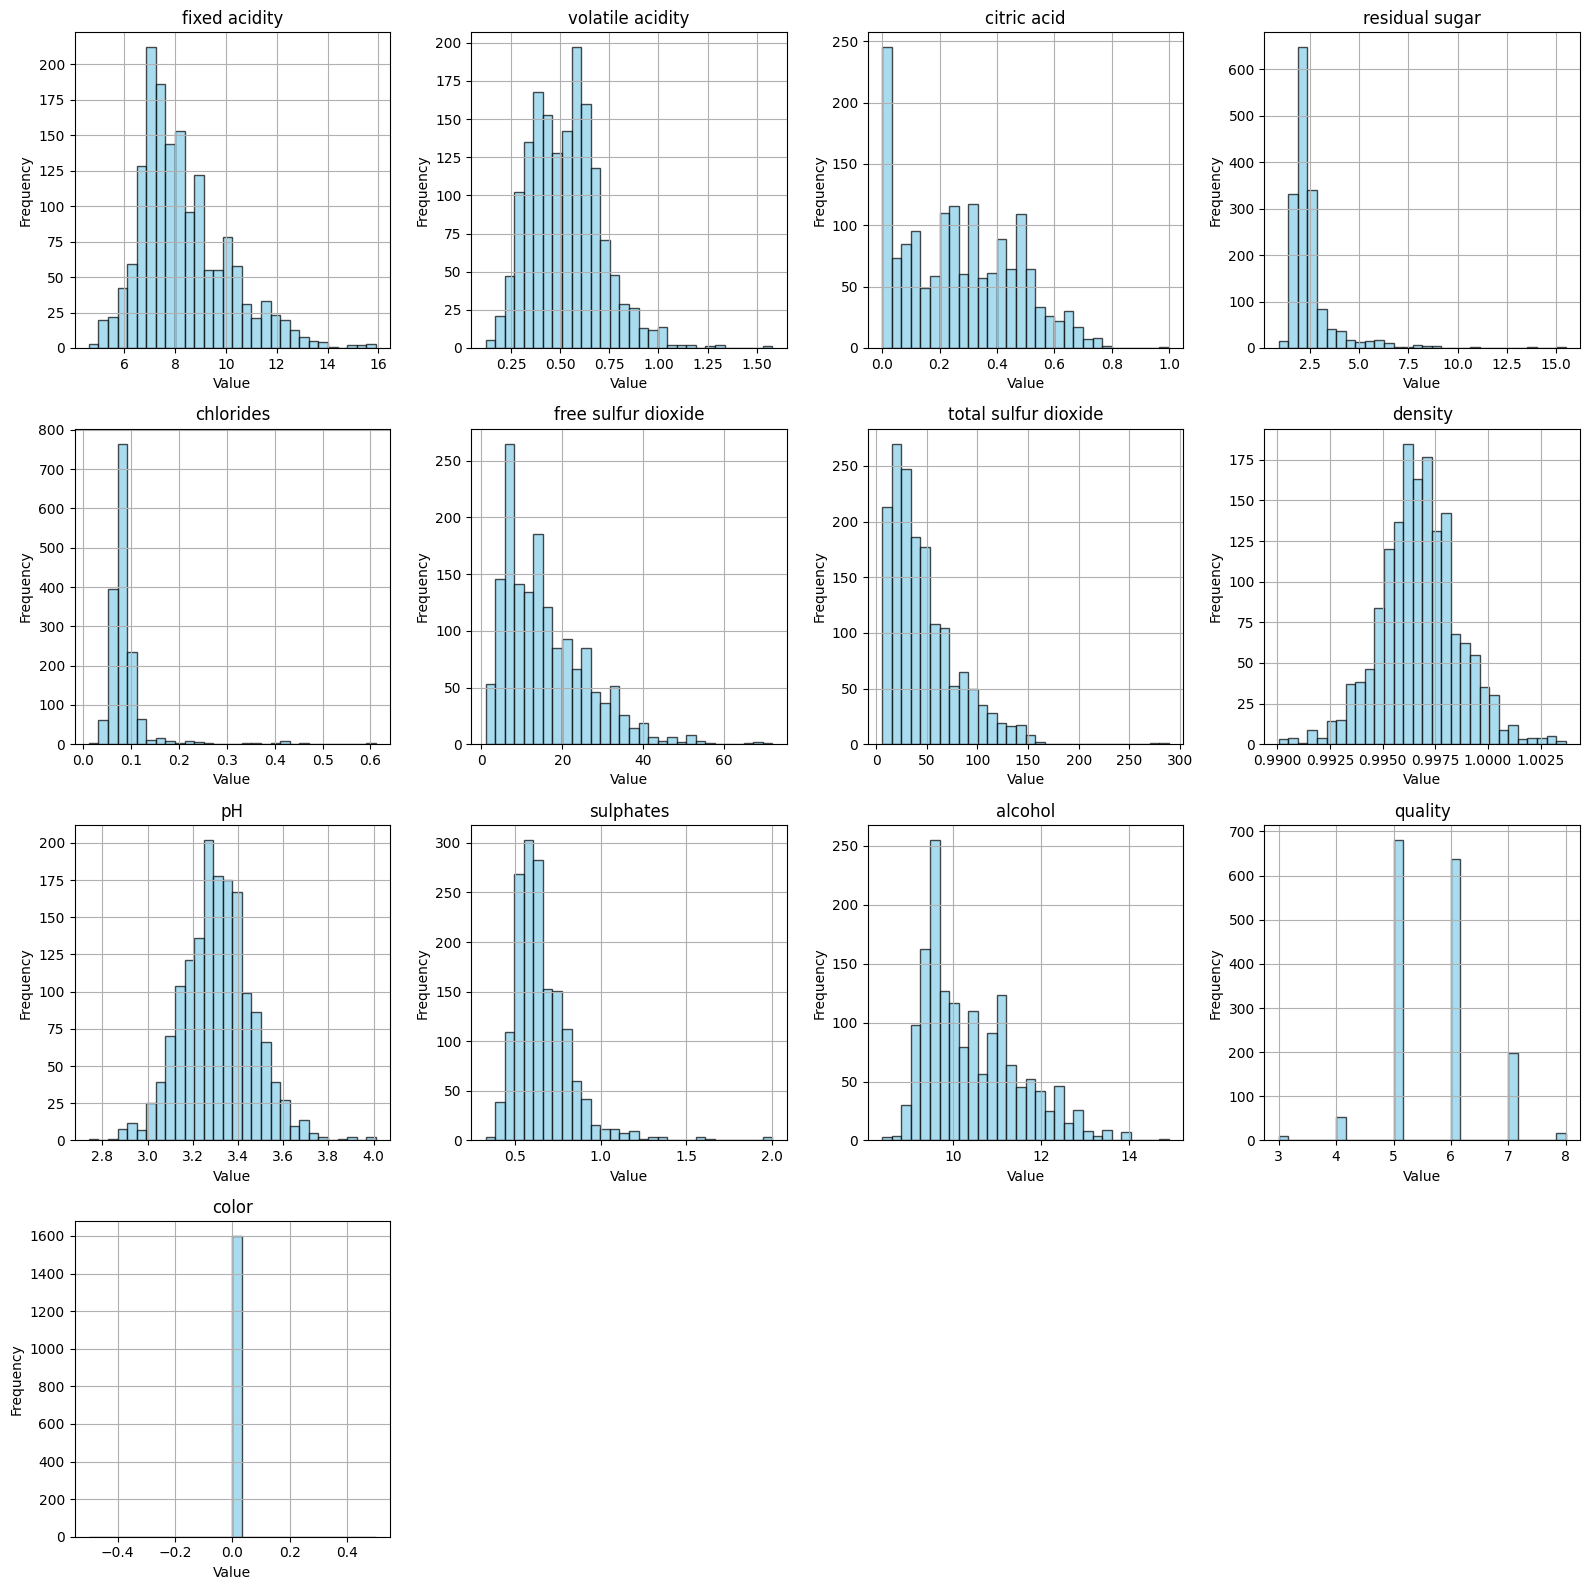

In [ ]:

#distribution of features in red wine
# Plotting the distribution of features
num_features = len(df_red.columns)
num_rows = (num_features + 3) // 4
num_cols = min(num_features, 4)

plt.figure(figsize=(16, 4 * num_rows))  # Adjust figure size based on number of features

for i, column in enumerate(df_red.columns):
    plt.subplot(num_rows, num_cols, i+1)
    df_red[column].hist(bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
df_red.info()
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  color                 1599 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 162.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
D

UNIQUE VALUES

In [ ]:
unique_val_red = df_red.iloc[:, -2].unique()
unique_val_white = df_white.iloc[:, -2].unique()
# Print the unique values red
print("Quality unique values(Red):")
print(unique_val_red)

# Print the unique values white
print("Quality unique values(White):")
print(unique_val_white)

Quality unique values(Red):
[5 6 7 4 8 3]
Quality unique values(White):
[6 5 7 8 4 3 9]


VIEWING AND CONCATENATING DATAFRAMES

In [ ]:
 # append data frames
new_df = [df_red, df_white]

# View data frame to check for success
df = pd.concat(new_df)

#view data frame (appended)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5,0
1,7.80,0.88,0.00,2.60,0.10,25.00,67.00,1.00,3.20,0.68,9.80,5,0
2,7.80,0.76,0.04,2.30,0.09,15.00,54.00,1.00,3.26,0.65,9.80,5,0
3,11.20,0.28,0.56,1.90,0.07,17.00,60.00,1.00,3.16,0.58,9.80,6,0
4,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5,0


In [ ]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
4893,6.20,0.21,0.29,1.60,0.04,24.00,92.00,0.99,3.27,0.50,11.20,6,1
4894,6.60,0.32,0.36,8.00,0.05,57.00,168.00,0.99,3.15,0.46,9.60,5,1
4895,6.50,0.24,0.19,1.20,0.04,30.00,111.00,0.99,2.99,0.46,9.40,6,1
4896,5.50,0.29,0.30,1.10,0.02,20.00,110.00,0.99,3.34,0.38,12.80,7,1
4897,6.00,0.21,0.38,0.80,0.02,22.00,98.00,0.99,3.26,0.32,11.80,6,1


In [ ]:
unique_val_df = df.iloc[:, -2].unique()

# Print the unique values
print("Quality unique values:")
print(unique_val_df)

Quality unique values:
[5 6 7 4 8 3 9]


PLOTTING AGAIN

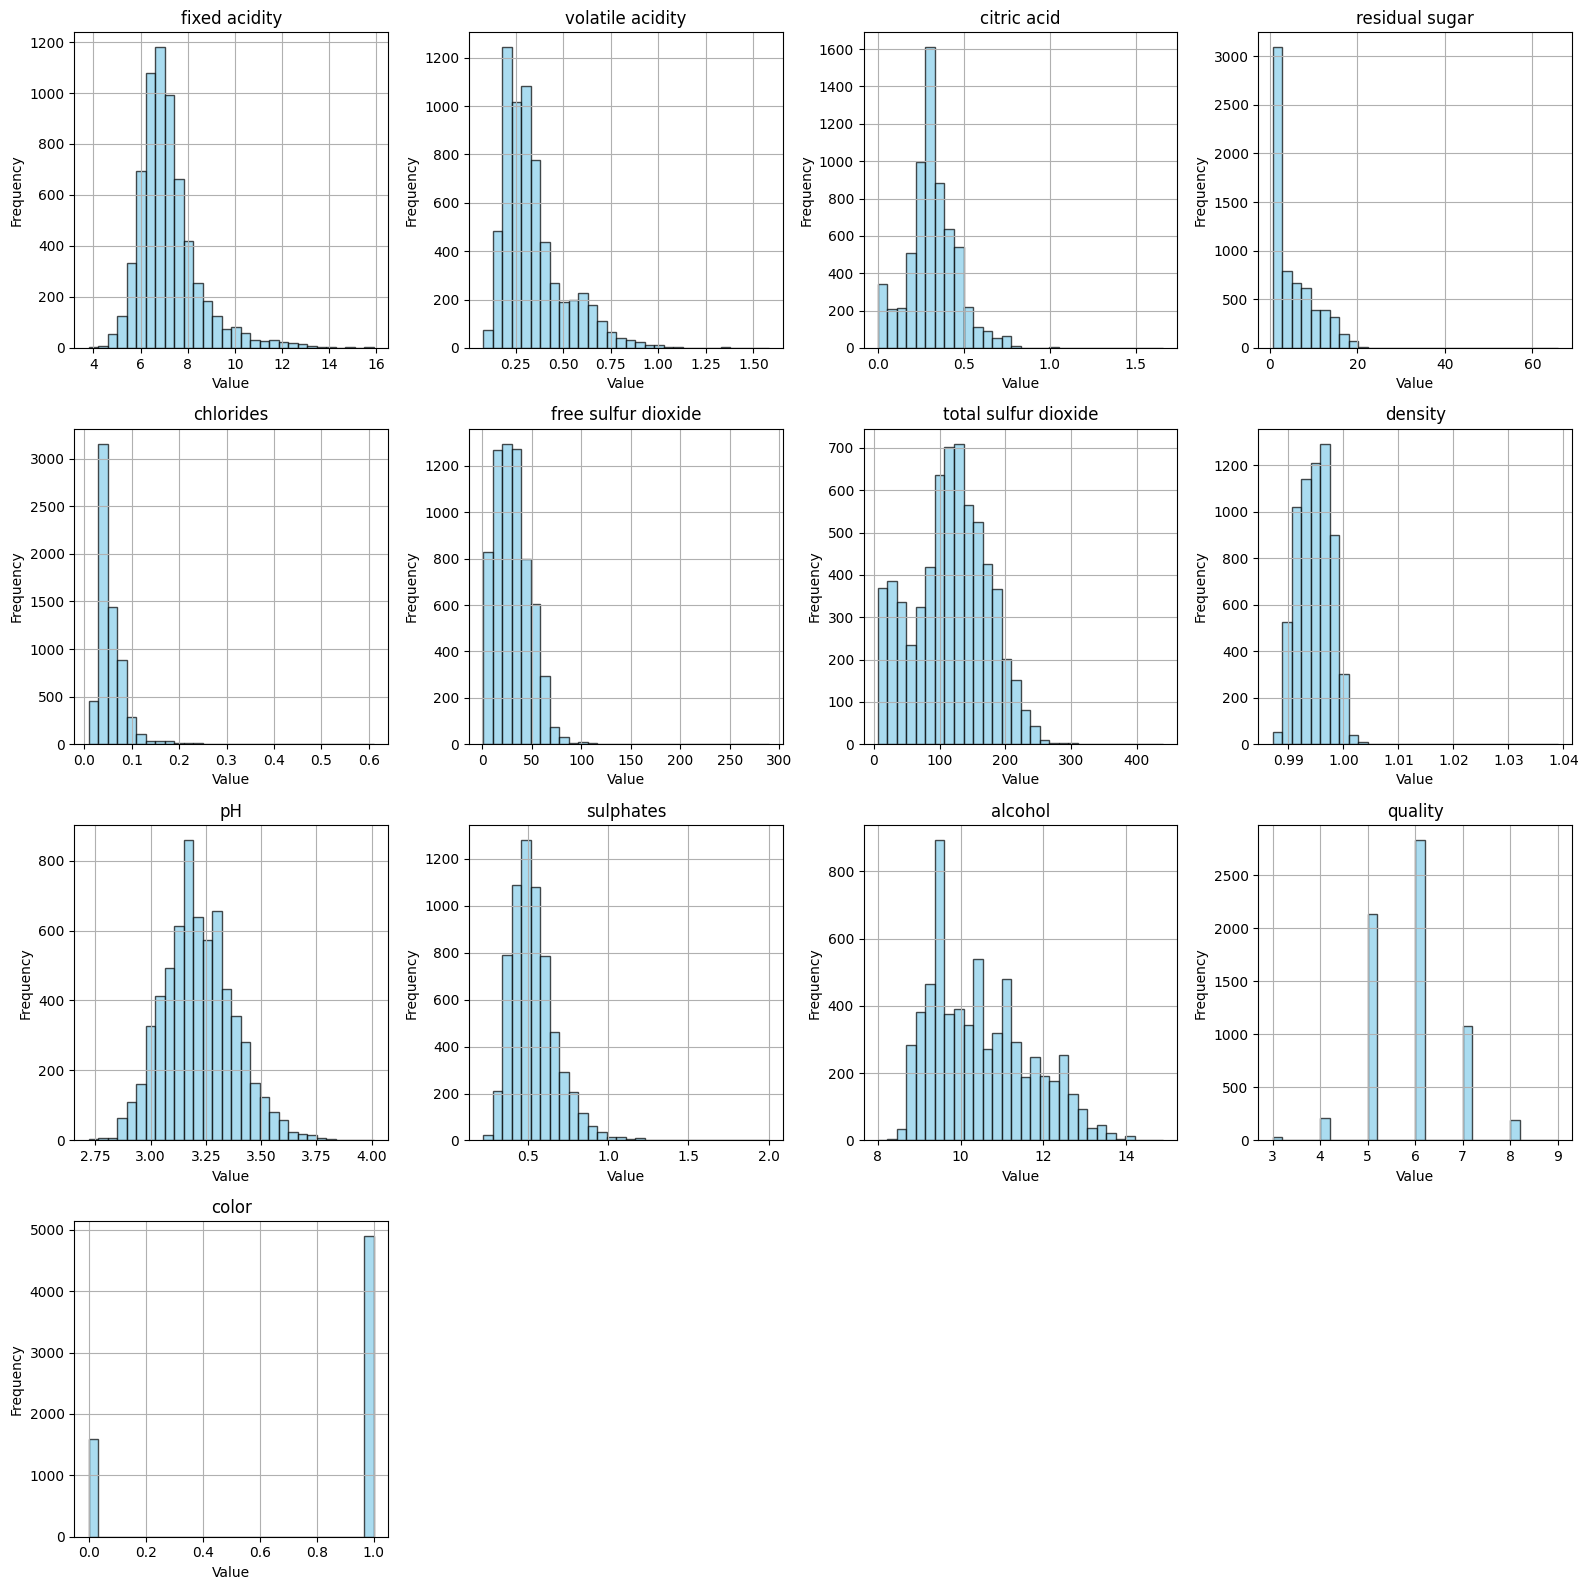

In [ ]:
import matplotlib.pyplot as plt

# Plotting the distribution of features
num_features = len(df.columns)
num_rows = (num_features + 3) // 4
num_cols = min(num_features, 4)

plt.figure(figsize=(16, 4 * num_rows))  # Adjust figure size based on number of features

for i, column in enumerate(df.columns):
    plt.subplot(num_rows, num_cols, i+1)
    df[column].hist(bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


SCATTER PLOTS

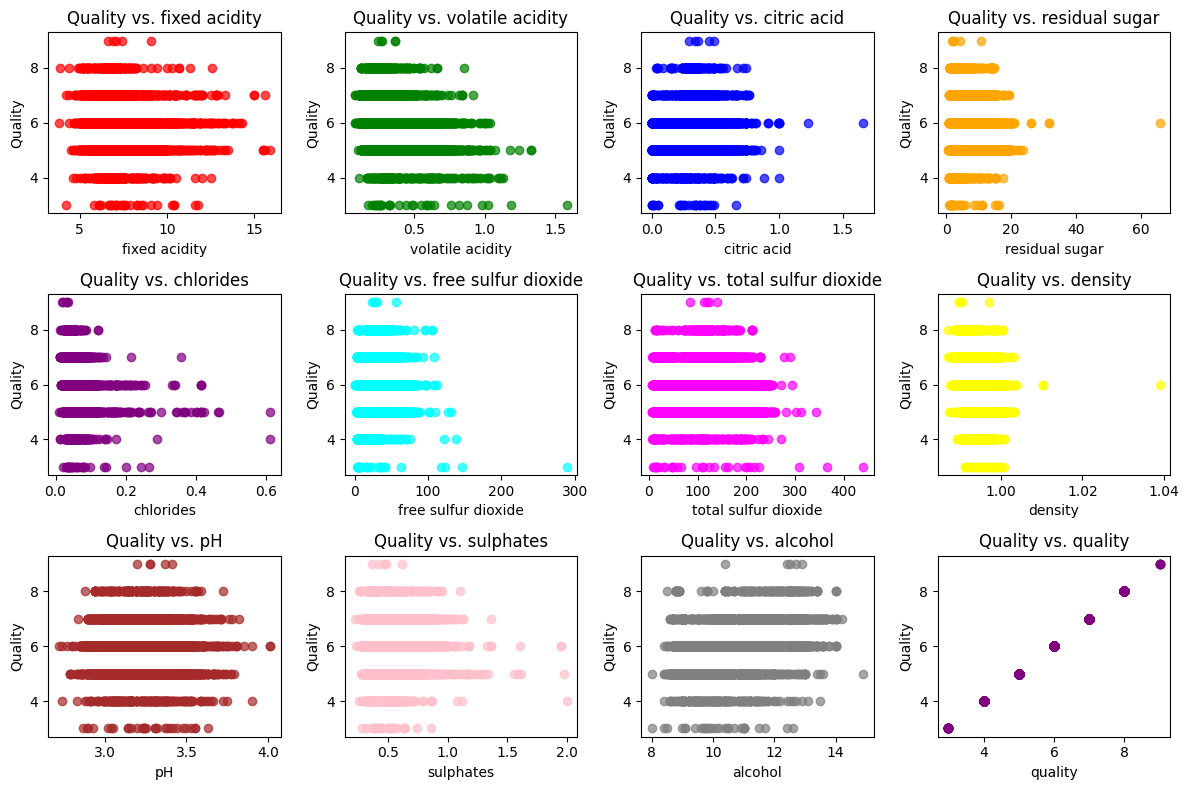

In [ ]:
import matplotlib.pyplot as plt
colors = ['red', 'green', 'blue', 'orange', 'purple', 'cyan', 'magenta', 'yellow', 'brown', 'pink', 'gray','purple']
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(3, 4, i+1)
    plt.scatter(df[column], df['quality'], color=colors[i], alpha=0.7)
    plt.title(f'Quality vs. {column}')
    plt.xlabel(column)
    plt.ylabel('Quality')
plt.tight_layout()
plt.show()


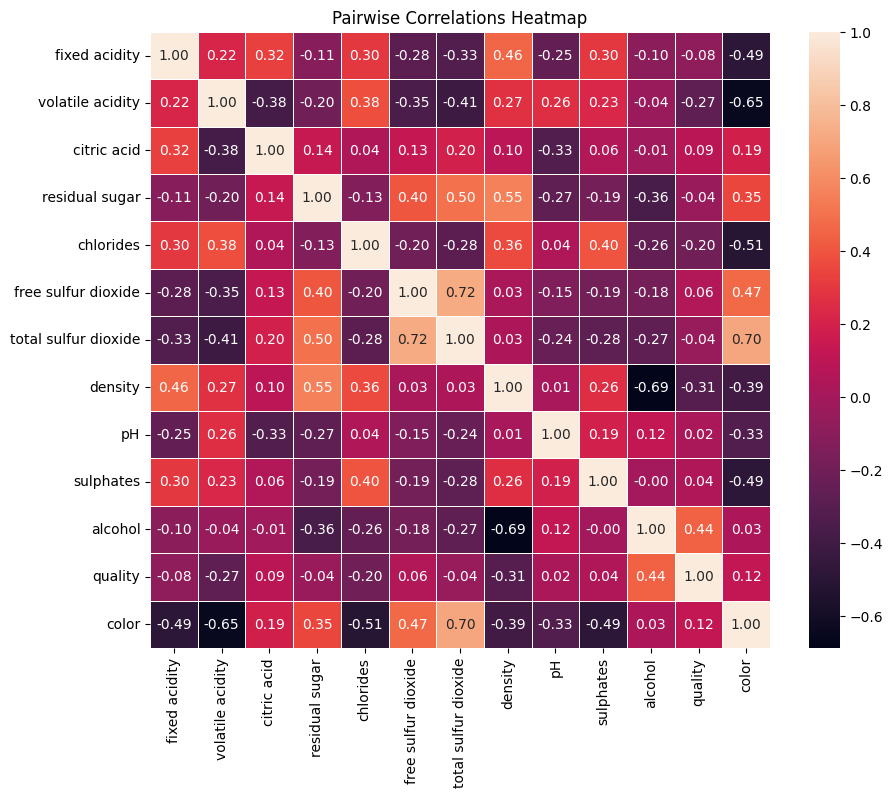

In [ ]:
import seaborn as sns

# Selecting only numerical columns
num_columns = df.select_dtypes(include=[np.number])
# Computing the correlation matrix
corr = num_columns.corr()
# Plotting the heatmap
plt.figure(figsize=[10, 8])
sns.heatmap(corr, annot=True,  fmt=".2f", linewidths=0.5)
plt.title("Pairwise Correlations Heatmap")
plt.show()

In [ ]:
pos_corr = pd.DataFrame(corr[(corr>0.5) & (corr<1)].stack())
pos_corr = pos_corr.rename(columns={0:'correlation'})
neg_corr = pd.DataFrame(corr[(corr>-1) & (corr<-0.5)].stack())
neg_corr = neg_corr.rename(columns={0:'correlation'})

In [ ]:
neg_corr.sort_values(by='correlation')*100

,,correlation
density,alcohol,-68.67
alcohol,density,-68.67
volatile acidity,color,-65.30
color,volatile acidity,-65.30
chlorides,color,-51.27
color,chlorides,-51.27


In [ ]:
pos_corr.sort_values(by='correlation')*100

,,correlation
residual sugar,density,55.25
density,residual sugar,55.25
total sulfur dioxide,color,70.04
color,total sulfur dioxide,70.04
free sulfur dioxide,total sulfur dioxide,72.09
total sulfur dioxide,free sulfur dioxide,72.09


# MILESTONE TWO: Data Preparation

In [ ]:
display(df.head(),df.tail())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5,0
1,7.80,0.88,0.00,2.60,0.10,25.00,67.00,1.00,3.20,0.68,9.80,5,0
2,7.80,0.76,0.04,2.30,0.09,15.00,54.00,1.00,3.26,0.65,9.80,5,0
3,11.20,0.28,0.56,1.90,0.07,17.00,60.00,1.00,3.16,0.58,9.80,6,0
4,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5,0


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
4893,6.20,0.21,0.29,1.60,0.04,24.00,92.00,0.99,3.27,0.50,11.20,6,1
4894,6.60,0.32,0.36,8.00,0.05,57.00,168.00,0.99,3.15,0.46,9.60,5,1
4895,6.50,0.24,0.19,1.20,0.04,30.00,111.00,0.99,2.99,0.46,9.40,6,1
4896,5.50,0.29,0.30,1.10,0.02,20.00,110.00,0.99,3.34,0.38,12.80,7,1
4897,6.00,0.21,0.38,0.80,0.02,22.00,98.00,0.99,3.26,0.32,11.80,6,1


In [ ]:
df['color'].unique()

array([0, 1])

In [ ]:
from IPython.display import display
display(df.head(), df.tail())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5,0
1,7.80,0.88,0.00,2.60,0.10,25.00,67.00,1.00,3.20,0.68,9.80,5,0
2,7.80,0.76,0.04,2.30,0.09,15.00,54.00,1.00,3.26,0.65,9.80,5,0
3,11.20,0.28,0.56,1.90,0.07,17.00,60.00,1.00,3.16,0.58,9.80,6,0
4,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5,0


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
4893,6.20,0.21,0.29,1.60,0.04,24.00,92.00,0.99,3.27,0.50,11.20,6,1
4894,6.60,0.32,0.36,8.00,0.05,57.00,168.00,0.99,3.15,0.46,9.60,5,1
4895,6.50,0.24,0.19,1.20,0.04,30.00,111.00,0.99,2.99,0.46,9.40,6,1
4896,5.50,0.29,0.30,1.10,0.02,20.00,110.00,0.99,3.34,0.38,12.80,7,1
4897,6.00,0.21,0.38,0.80,0.02,22.00,98.00,0.99,3.26,0.32,11.80,6,1


In [ ]:
# Define a function to map quality ratings to classes
def map_quality(quality):
    if quality < 4:
        return 'Poor'
    elif quality >= 4 and quality <= 6:
        return 'Average'
    else:
        return 'Excellent'

# Apply the function to create the 'target' column
df['target'] = df['quality'].apply(map_quality)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,target
0,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5,0,Average
1,7.80,0.88,0.00,2.60,0.10,25.00,67.00,1.00,3.20,0.68,9.80,5,0,Average
2,7.80,0.76,0.04,2.30,0.09,15.00,54.00,1.00,3.26,0.65,9.80,5,0,Average
3,11.20,0.28,0.56,1.90,0.07,17.00,60.00,1.00,3.16,0.58,9.80,6,0,Average
4,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5,0,Average


## We can now proceed with our data Exploration to achieve the tasks
### You should   
        ● split your data into train and test sets if necessary - check**   
            ○ choose adequate sizes for these subsets - check    
            ○ consider prior target distributions - check    
        ● improve data quality if necessary**      
            ○ fill or drop features (or samples) with missing values - no null    
            ○ optionally use other improvement methods (e.g. filter identifiable outlier   
        samples)- nothing to do    
        ● perform feature engineering and pre-processing    
            ○ prepare features for use with the sklearn API (e.g. conversions) - all numerical    
            ○ create new features (hand-crafted and/or generated)     
        ■ try to create at least 3 new hand-crafted features from the existing    
        columns if possible (be creative 🙂)    
            ○ consider other pre-processing methods (e.g. scaling)    
            ○ perform feature selection based on prior and/or new analyses   

In [ ]:
# Calculate the correlation matrix, excluding the 'color' and 'target' column
corr_matrix = df.drop(['color', 'target'], axis=1).corr()

# The threshold for considering a correlation as 'high'
threshold = 0.68

# A set to keep track of columns to drop
columns_to_drop = set()

# Iterate over the correlation matrix to identify highly correlated pairs and decide on columns to drop
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            # Print the names of the columns and the correlation coefficient
            col_name_a = corr_matrix.columns[i]
            col_name_b = corr_matrix.columns[j]
            print(f"{col_name_a} and {col_name_b} have a correlation of {corr_matrix.iloc[i, j]:.2f}")

            # Decide to drop one of the columns (arbitrarily choosing the second in the pair here)
            col_to_drop = corr_matrix.columns[i]
            columns_to_drop.add(col_to_drop)

# Drop the identified columns from the original DataFrame
df_reduced = df.drop(columns=columns_to_drop)

# Display the head and tail of the reduced DataFrame to verify changes
display(df_reduced.head())
display(df_reduced.tail())


total sulfur dioxide and free sulfur dioxide have a correlation of 0.72
alcohol and density have a correlation of -0.69


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,quality,color,target
0,7.40,0.70,0.00,1.90,0.08,11.00,1.00,3.51,0.56,5,0,Average
1,7.80,0.88,0.00,2.60,0.10,25.00,1.00,3.20,0.68,5,0,Average
2,7.80,0.76,0.04,2.30,0.09,15.00,1.00,3.26,0.65,5,0,Average
3,11.20,0.28,0.56,1.90,0.07,17.00,1.00,3.16,0.58,6,0,Average
4,7.40,0.70,0.00,1.90,0.08,11.00,1.00,3.51,0.56,5,0,Average


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,quality,color,target
4893,6.20,0.21,0.29,1.60,0.04,24.00,0.99,3.27,0.50,6,1,Average
4894,6.60,0.32,0.36,8.00,0.05,57.00,0.99,3.15,0.46,5,1,Average
4895,6.50,0.24,0.19,1.20,0.04,30.00,0.99,2.99,0.46,6,1,Average
4896,5.50,0.29,0.30,1.10,0.02,20.00,0.99,3.34,0.38,7,1,Excellent
4897,6.00,0.21,0.38,0.80,0.02,22.00,0.99,3.26,0.32,6,1,Average


# Spliting the Data

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X = df_reduced.drop(['quality','target'], axis=1)  # Features: all columns except 'quality'
y = df_reduced['quality']               # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=789 ,stratify=y)


In [ ]:
# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#display(X_train)
#display(X_test)

## Adding new columns/features our dataframe X_train and X_test

In [ ]:
X_train['sulphates ph product'] = X_train['sulphates'] * X_train['pH']
X_train['chlorides ph ratio'] = X_train['chlorides'] / X_train['pH']
X_train['fixed to volatile acidity ratio'] = X_train['fixed acidity'] / X_train['volatile acidity']

In [ ]:
X_test['sulphates ph product'] = X_test['sulphates'] * X_test['pH']
X_test['chlorides ph ratio'] = X_test['chlorides'] / X_test['pH']
X_test['fixed to volatile acidity ratio'] = X_test['fixed acidity'] / X_test['volatile acidity']

In [ ]:
#display(X)
#display(X_train)
#display(X_test)

In [ ]:
#display(X_train, X_test)

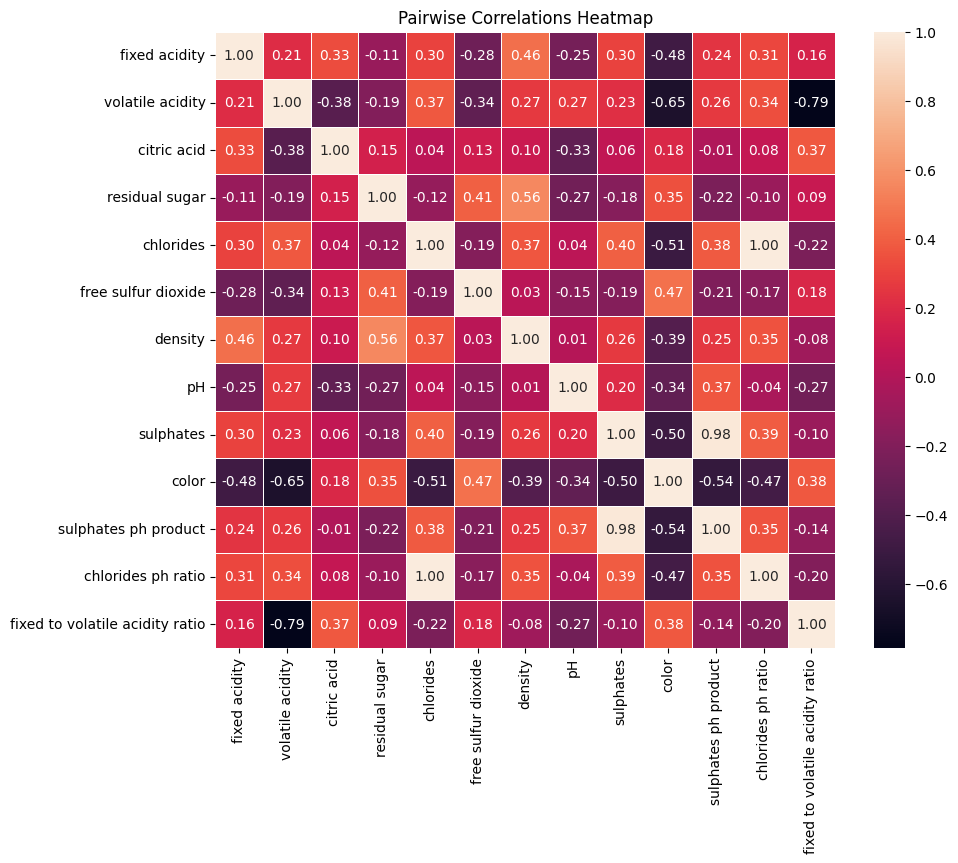

In [ ]:
# Selecting only numerical columns
num_columns = X_train.select_dtypes(include=[np.number])
# Computing the correlation matrix
corr = num_columns.corr()
# Plotting the heatmap
plt.figure(figsize=[10, 8])
sns.heatmap(corr, annot=True,  fmt=".2f", linewidths=0.5)
plt.title("Pairwise Correlations Heatmap")
plt.show()

In [ ]:
pos_corr = pd.DataFrame(corr[(corr>0.5) & (corr<1)].stack())
pos_corr = pos_corr.rename(columns={0:'correlation'})
neg_corr = pd.DataFrame(corr[(corr>-1) & (corr<-0.5)].stack())
neg_corr = neg_corr.rename(columns={0:'correlation'})

In [ ]:
neg_corr.sort_values(by='correlation')*100

correlation
volatile acidity                fixed to volatile acidity ratio       -78.60
fixed to volatile acidity ratio volatile acidity                      -78.60
volatile acidity                color                                 -65.07
color                           volatile acidity                      -65.07
                                sulphates ph product                  -53.58
sulphates ph product            color                                 -53.58
chlorides                       color                                 -51.21
color                           chlorides                             -51.21

In [ ]:
pos_corr.sort_values(by='correlation')*100

,,correlation
residual sugar,density,55.88
density,residual sugar,55.88
sulphates,sulphates ph product,98.30
sulphates ph product,sulphates,98.30
chlorides,chlorides ph ratio,99.53
chlorides ph ratio,chlorides,99.53


## Feature Selection after new columns have been added

In [ ]:
# Build a random forest model
rf = RandomForestClassifier()

# Fit the model
rf.fit(X_train, y_train)

# Get feature importance
importances = rf.feature_importances_

# Transform importances into a DataFrame
features_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Sort features by importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Consider selecting top-n features, for example
selected_features = features_df['Feature'][:10].values

# Selected features DataFrame
X_train_selected = X_train[selected_features]
X_train_selected.head()


,density,fixed to volatile acidity ratio,chlorides ph ratio,sulphates ph product,residual sugar,free sulfur dioxide,volatile acidity,pH,chlorides,citric acid
4277,0.99,32.73,0.02,1.54,5.50,37.00,0.22,3.08,0.05,0.35
906,0.99,30.74,0.02,1.88,1.30,8.00,0.27,3.08,0.05,0.45
1366,0.99,50.00,0.01,1.40,0.90,22.00,0.14,3.25,0.04,0.41
308,1.00,23.95,0.07,2.01,2.40,5.00,0.43,3.19,0.21,0.44
1971,0.99,15.37,0.01,2.79,3.20,49.00,0.41,3.53,0.03,0.30


# MILESTONE THREE
## You should
     ● select a proper metric for evaluation
            ○ you can select multiple metrics
            ○ if your dataset’s Kaggle page recommends a metric, feel free to use that as well
            ○ make sure you understand what the selected metric means/stands for
     ● create a proper baseline model
            ○ you can use simple strategies or simple hand-crafted rules based on the features
     ● select and train at least two machine learning models that are appropriate for your task and dataset
            ○ i.e. use two different machine learning algorithms (e.g. SVM and k-NN)
            ○ perform hyperparameter-tuning
     ● evaluate the resulting models with the chosen metrics
            ○ compare their performances with your baseline

In [ ]:
!pip install lazypredict #it's for just adding lazypredict ))
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_predict
from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import accuracy_score, cohen_kappa_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold


DEFINING HYPERPARAMETERS

In [87]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


TRAINING...

In [ ]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)
#StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=cv, scoring='accuracy')
grid_search.fit(X_train, y_train)# Get the best hyperparameters from grid search

best_params = grid_search.best_params_

# Train the RandomForestClassifier with the best hyperparameters
rf_best = RandomForestClassifier(**best_params)
rf_best.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_best.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy (Random Forest with selected features):", accuracy)

Accuracy (Random Forest with selected features): 0.6592307692307692


Classification Report:
              precision  recall  f1-score  support
3                  0.00    0.00      0.00     6.00
4                  1.00    0.16      0.28    43.00
5                  0.67    0.68      0.68   428.00
6                  0.62    0.76      0.69   567.00
7                  0.74    0.51      0.60   216.00
8                  0.94    0.44      0.60    39.00
9                  0.00    0.00      0.00     1.00
accuracy           0.66    0.66      0.66     0.66
macro avg          0.57    0.36      0.41  1300.00
weighted avg       0.68    0.66      0.65  1300.00


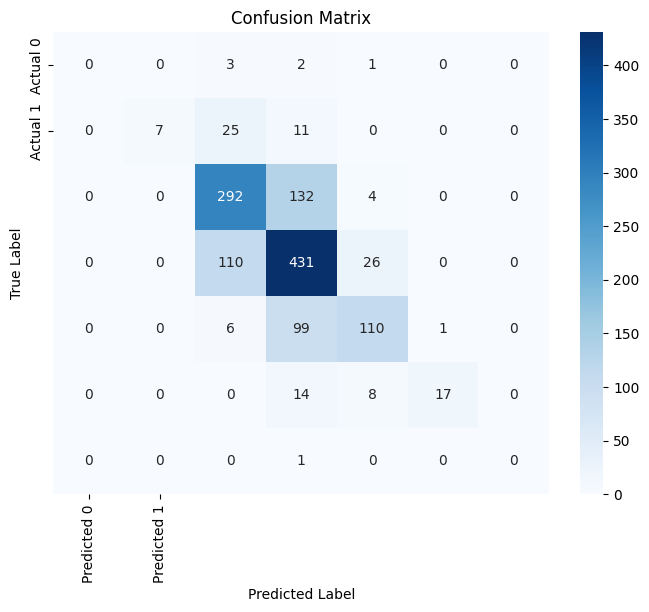

In [ ]:
# Generate the classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Convert the classification report to a DataFrame
df_report = pd.DataFrame(report).transpose()

# Print the DataFrame
print("Classification Report:")
print(df_report)


# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Best Parameters for ExtraTreesClassifier: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Best Score for ExtraTreesClassifier: 0.6592309543199821


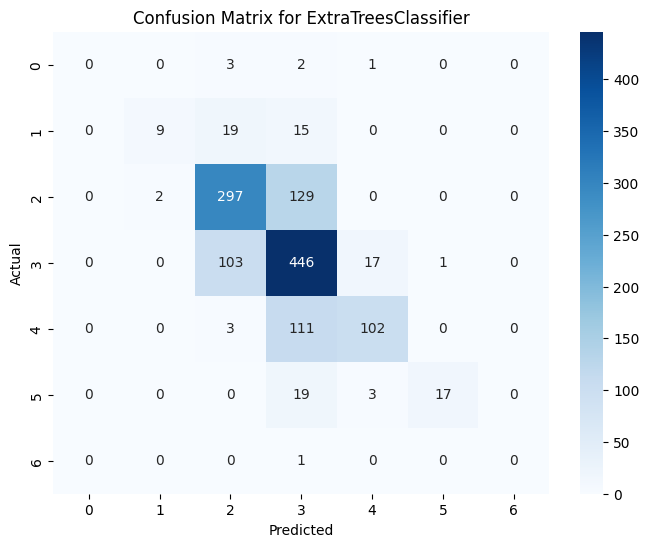

Accuracy for ExtraTreesClassifier: 0.67

Classification Report for ExtraTreesClassifier:
              precision  recall  f1-score  support
3                  0.00    0.00      0.00     6.00
4                  0.82    0.21      0.33    43.00
5                  0.70    0.69      0.70   428.00
6                  0.62    0.79      0.69   567.00
7                  0.83    0.47      0.60   216.00
8                  0.94    0.44      0.60    39.00
9                  0.00    0.00      0.00     1.00
accuracy           0.67    0.67      0.67     0.67
macro avg          0.56    0.37      0.42  1300.00
weighted avg       0.69    0.67      0.66  1300.00


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression

# Initialize ExtraTreesClassifier
et_classifier = ExtraTreesClassifier()

# Hyperparameter grid for ExtraTreesClassifier
et_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Perform GridSearchCV for ExtraTreesClassifier
et_grid_search = GridSearchCV(estimator=et_classifier, param_grid=et_param_grid, cv=5)
et_grid_search.fit(X_train, y_train)

# Get the best parameters and best score for ExtraTreesClassifier
et_best_params = et_grid_search.best_params_
et_best_score = et_grid_search.best_score_

print("Best Parameters for ExtraTreesClassifier:", et_best_params)
print("Best Score for ExtraTreesClassifier:", et_best_score)

# Train ExtraTreesClassifier with the best parameters
et_best_classifier = ExtraTreesClassifier(**et_best_params)
et_best_classifier.fit(X_train, y_train)

# Make predictions with ExtraTreesClassifier
et_y_pred = et_best_classifier.predict(X_test)


# Calculate accuracy for ExtraTreesClassifier
et_accuracy = accuracy_score(y_test, et_y_pred)

# Generate classification report for ExtraTreesClassifier
et_report_dict = classification_report(y_test, et_y_pred, output_dict=True)
et_report_df = pd.DataFrame(et_report_dict).transpose()

# Generate confusion matrix for ExtraTreesClassifier
et_cm = confusion_matrix(y_test, et_y_pred)

# Plot confusion matrix as heatmap for ExtraTreesClassifier
plt.figure(figsize=(8, 6))
sns.heatmap(et_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for ExtraTreesClassifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("Accuracy for ExtraTreesClassifier:", et_accuracy)
print("\nClassification Report for ExtraTreesClassifier:")
print(et_report_df)



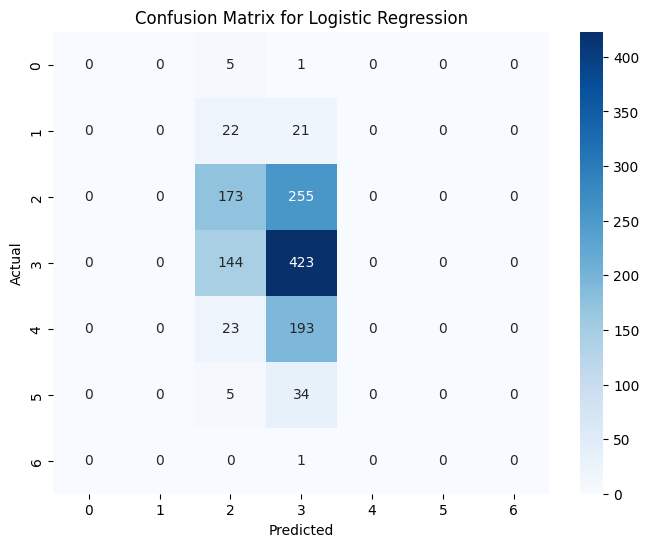


Accuracy for Logistic Regression: 0.4584615384615385

Classification Report for Logistic Regression:
              precision  recall  f1-score  support
3                  0.00    0.00      0.00     6.00
4                  0.00    0.00      0.00    43.00
5                  0.47    0.40      0.43   428.00
6                  0.46    0.75      0.57   567.00
7                  0.00    0.00      0.00   216.00
8                  0.00    0.00      0.00    39.00
9                  0.00    0.00      0.00     1.00
accuracy           0.46    0.46      0.46     0.46
macro avg          0.13    0.16      0.14  1300.00
weighted avg       0.35    0.46      0.39  1300.00


In [ ]:
# Hyperparameter grid for Logistic Regression
lr_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Initialize logistic regression classifier
logistic_regression = LogisticRegression()

# Perform GridSearchCV for Logistic Regression
lr_grid_search = GridSearchCV(estimator=logistic_regression, param_grid=lr_param_grid, cv=5)
lr_grid_search.fit(X_train, y_train)

# Make predictions using the best estimator
lr_y_pred = lr_grid_search.best_estimator_.predict(X_test)

# Calculate accuracy for Logistic Regression
lr_accuracy = accuracy_score(y_test, lr_y_pred)

# Generate classification report for Logistic Regression
lr_report_dict = classification_report(y_test, lr_y_pred, output_dict=True)
lr_report_df = pd.DataFrame(lr_report_dict).transpose()

# Generate confusion matrix for Logistic Regression
lr_cm = confusion_matrix(y_test, lr_y_pred)

# Plot confusion matrix as heatmap for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(lr_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nAccuracy for Logistic Regression:", lr_accuracy)
print("\nClassification Report for Logistic Regression:")
print(lr_report_df)

# MILESTONE 4


# Feature Engineering => ZaraSOFT

In [90]:
import pandas as pd

# Load the datasets
df_red = pd.read_csv('winequality-red.csv')
df_white = pd.read_csv('winequality-white.csv')

# Combine the datasets for a comprehensive analysis
df = pd.concat([df_red, df_white], ignore_index=True)

# Display the first few rows to understand the dataset
print(df.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0           7.40              0.70         0.00            1.90       0.08   
1           7.80              0.88         0.00            2.60       0.10   
2           7.80              0.76         0.04            2.30       0.09   
3          11.20              0.28         0.56            1.90       0.07   
4           7.40              0.70         0.00            1.90       0.08   

   free sulfur dioxide  total sulfur dioxide  density   pH  sulphates  \
0                11.00                 34.00     1.00 3.51       0.56   
1                25.00                 67.00     1.00 3.20       0.68   
2                15.00                 54.00     1.00 3.26       0.65   
3                17.00                 60.00     1.00 3.16       0.58   
4                11.00                 34.00     1.00 3.51       0.56   

   alcohol  quality  
0     9.40        5  
1     9.80        5  
2     9.80        5  
3   

# Interaction Terms

In [91]:
# Interaction between fixed acidity and residual sugar
df['acid_sugar_ratio'] = df['fixed acidity'] / df['residual sugar']

# Interaction between fixed acidity and volatile acidity
df['total_acidity'] = df['fixed acidity'] + df['volatile acidity']

# Preview => the new features
print(df[['acid_sugar_ratio', 'total_acidity']].head())


   acid_sugar_ratio  total_acidity
0              3.89           8.10
1              3.00           8.68
2              3.39           8.56
3              5.89          11.48
4              3.89           8.10


# Polynomial Features

In [92]:
from sklearn.preprocessing import PolynomialFeatures

# Selecting a feature to transform
poly = PolynomialFeatures(degree=2, include_bias=False)
alcohol_poly = poly.fit_transform(df[['alcohol']])

# Create a DataFrame of the new polynomial feature
df_poly = pd.DataFrame(alcohol_poly, columns=['alcohol', 'alcohol_squared'])
df = pd.concat([df, df_poly['alcohol_squared']], axis=1)

# Preview the =>  new polynomial feature
print(df[['alcohol', 'alcohol_squared']].head())


   alcohol  alcohol_squared
0     9.40            88.36
1     9.80            96.04
2     9.80            96.04
3     9.80            96.04
4     9.40            88.36


#Binning

In [93]:
# Binning alcohol content into categories
df['alcohol_bin'] = pd.cut(df['alcohol'], bins=[0, 9, 12, 15], labels=['Low', 'Medium', 'High'])

# Preview the new binned feature
print(df[['alcohol', 'alcohol_bin']].head())


   alcohol alcohol_bin
0     9.40      Medium
1     9.80      Medium
2     9.80      Medium
3     9.80      Medium
4     9.40      Medium


# Model Training with New Features

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Prepare the => data
X = pd.get_dummies(df.drop('quality', axis=1))  # One-hot encode categorical features
y = df['quality']

# Split the  => data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the => model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predicting and evaluating)
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.86      0.14      0.24        43
           5       0.66      0.72      0.69       402
           6       0.67      0.75      0.71       597
           7       0.71      0.55      0.62       215
           8       0.87      0.36      0.51        36
           9       0.00      0.00      0.00         1

    accuracy                           0.67      1300
   macro avg       0.54      0.36      0.40      1300
weighted avg       0.68      0.67      0.66      1300

